# Tarefa I2A2 
The dataset is a corpus which contains varied information, that it can be useful for several NLP/CL tasks.
The first that comes to mind is sentiment analysis. Sentiment analysis is the task of assigning a sentiment (or a position) to the content of a given text.

The complete corpus has 132,373 reviews, left by 112,993 different users regarding 48,001 unique products. The reviews were collected from January to May, 2018. All reviews submitted to the e-commerce website are present in the corpus. It means that one can find offensive language, repeated reviews and reviews composed by only one word in the present data. These kinds of reviews are often not accepted to be displayed on the website. So, this means that this resource is richer than one could get crawling the e-commerce website.

# Sergio Eduardo Palmiere

# Importando bibliotecas necessarias

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from textblob import TextBlob
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Carregando os dados

In [4]:
df = pd.read_csv('C:/Users/palmi/I2A2_Test/train.csv') 

C:\Users\palmi\AppData\Local\Temp\ipykernel_13284\2639139540.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/palmi/I2A2_Test/train.csv')


In [5]:
df.head()

,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating
0,1,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,1958.0,F,RJ,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,1996.0,M,SC,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,1984.0,M,SP,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,1979.0,M,PA,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5
4,5,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,NaN,NaN,NaN,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5


In [6]:
# Transformando a coluna ID em Index
df.set_index('ID')

,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating
ID,,,,,,,,,,,,,,
1,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,1958.0,F,RJ,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
2,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,1996.0,M,SC,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
3,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,1984.0,M,SP,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
4,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,1979.0,M,PA,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5
5,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,NaN,NaN,NaN,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79421,2018-05-31 23:14:36,112736aaeb05b58ebf449e73706a2934792acc165d09d8...,1979.0,M,DF,132439701,"Smart TV LED 39"" Philco PH39N86DSGW HD com Con...",NaN,TV e Home Theater,TV,Cancelei não pega Netflix,Infelizmente o Netflix não funciona e esse era...,No,1
79422,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,1988.0,M,RS,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,"Vale muito, estou usando no controle do Xbox e...",Yes,5
79423,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,1979.0,F,SP,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,"Prático e barato, super indico o produto para ...",Yes,5


In [7]:
# Dimensao do Dataframe
df.shape

(79425, 15)

# Explorando os Dados

In [8]:
df.describe()

,ID,reviewer_birth_year,rating
count,79425.000000,75874.000000,79425.000000
mean,39713.000000,1977.525015,3.486572
std,22928.166902,20.102430,1.532714
min,1.000000,59.000000,1.000000
25%,19857.000000,1969.000000,2.000000
50%,39713.000000,1980.000000,4.000000
75%,59569.000000,1987.000000,5.000000
max,79425.000000,2018.000000,5.000000


In [9]:
df.columns

Index(['ID', 'submission_date', 'reviewer_id', 'reviewer_birth_year',
       'reviewer_gender', 'reviewer_state', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'review_text', 'recommend_to_a_friend', 'rating'],
      dtype='object')

In [10]:
df.dtypes

ID                         int64
submission_date           object
reviewer_id               object
reviewer_birth_year      float64
reviewer_gender           object
reviewer_state            object
product_id                object
product_name              object
product_brand             object
site_category_lv1         object
site_category_lv2         object
review_title              object
review_text               object
recommend_to_a_friend     object
rating                     int64
dtype: object

In [11]:
# Contabilizando valores nulos no dataframe
df.isnull().sum()

ID                           0
submission_date              0
reviewer_id                  0
reviewer_birth_year       3551
reviewer_gender           2484
reviewer_state            2402
product_id                   0
product_name                52
product_brand            54779
site_category_lv1            4
site_category_lv2         2418
review_title               177
review_text               1967
recommend_to_a_friend       11
rating                       0
dtype: int64

# Limpando os Dados

In [12]:
# Definindo as colunas a serem usadas 
df_corr = df.iloc[: , [0,4,5,12,13,14]].copy() 

In [13]:
df_corr.head(5)

,ID,reviewer_gender,reviewer_state,review_text,recommend_to_a_friend,rating
0,1,F,RJ,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,M,SC,"Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,M,SP,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,M,PA,"Excelente produto, por fora em material acríli...",Yes,5
4,5,NaN,NaN,"produto mto bom, com essa garrafinha vc pode a...",Yes,5


In [14]:
# Sem mudar de categorico

In [15]:
df_corr['reviewer_gender'] = df_corr['reviewer_gender'].replace({np.nan: 'I'})
df_corr['recommend_to_a_friend'] = df_corr['recommend_to_a_friend'].replace({np.nan: 'talvez' })
df_corr['review_text'] = df_corr['review_text'].replace({np.nan: 'Sem avaliacao'})
df_corr['reviewer_state'] = df_corr['reviewer_state'].replace({np.nan: 'Brasil'})

In [16]:
# Dataset corrigido
df_corr.head(5)

,ID,reviewer_gender,reviewer_state,review_text,recommend_to_a_friend,rating
0,1,F,RJ,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,M,SC,"Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,M,SP,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,M,PA,"Excelente produto, por fora em material acríli...",Yes,5
4,5,I,Brasil,"produto mto bom, com essa garrafinha vc pode a...",Yes,5


In [17]:
# Verificando valores nulos
df_corr.isnull().sum()

ID                       0
reviewer_gender          0
reviewer_state           0
review_text              0
recommend_to_a_friend    0
rating                   0
dtype: int64

In [18]:
# Verificando dados duplicados
df_corr.duplicated().sum() 

0

In [19]:
# Dimensao dos dados
df_corr.shape

(79425, 6)

In [20]:
# Verificando dados unicos para cada coluna
df_corr.nunique() 

ID                       79425
reviewer_gender              3
reviewer_state              28
review_text              76490
recommend_to_a_friend        3
rating                       5
dtype: int64

#Inserindo uma coluna da analise de sentimentos baseada em review_text, onde 0 representa ruim, 1 representa regular e 2 representa bom

In [21]:
df_corr['sentiment'] = df_corr['review_text'].apply(lambda x: 0 if TextBlob(x).sentiment.polarity < 0 
                                          else 1 if TextBlob(x).sentiment.polarity == 0
                                          else 2 if 0 < TextBlob(x).sentiment.polarity < 0.5
                                          else 3)

In [22]:
df_corr.tail(5)

,ID,reviewer_gender,reviewer_state,review_text,recommend_to_a_friend,rating,sentiment
79420,79421,M,DF,Infelizmente o Netflix não funciona e esse era...,No,1,1
79421,79422,M,RS,"Vale muito, estou usando no controle do Xbox e...",Yes,5,1
79422,79423,F,SP,"Prático e barato, super indico o produto para ...",Yes,5,2
79423,79424,M,RJ,"Material fraco, poderia ser melhor. Ficou deve...",No,1,1
79424,79425,F,ES,"Comprei esse produto, quando chegou estava com...",No,1,1


In [23]:
df_corr.dtypes

ID                        int64
reviewer_gender          object
reviewer_state           object
review_text              object
recommend_to_a_friend    object
rating                    int64
sentiment                 int64
dtype: object

In [24]:
# Divida os dados em conjuntos de treinamento, teste e validação
train_data, test_data = train_test_split(df_corr, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [25]:
# Examine as formas dos conjuntos de dados
print(f"Treinamento: {len(train_data)} amostras")
print(f"Teste: {len(test_data)} amostras")
print(f"Validação: {len(val_data)} amostras")

Treinamento: 57186 amostras
Teste: 15885 amostras
Validação: 6354 amostras


# Treinando o Modelo

                   Model       MSE            R2
0       LinearRegression  2.357257  1.169319e-03
1                  Ridge  2.357251  1.171700e-03
2                  Lasso  2.360017 -4.664532e-07
3  RandomForestRegressor  2.359395  2.629973e-04
Melhor modelo:
Model       Ridge
MSE      2.357251
R2       0.001172
Name: 1, dtype: object


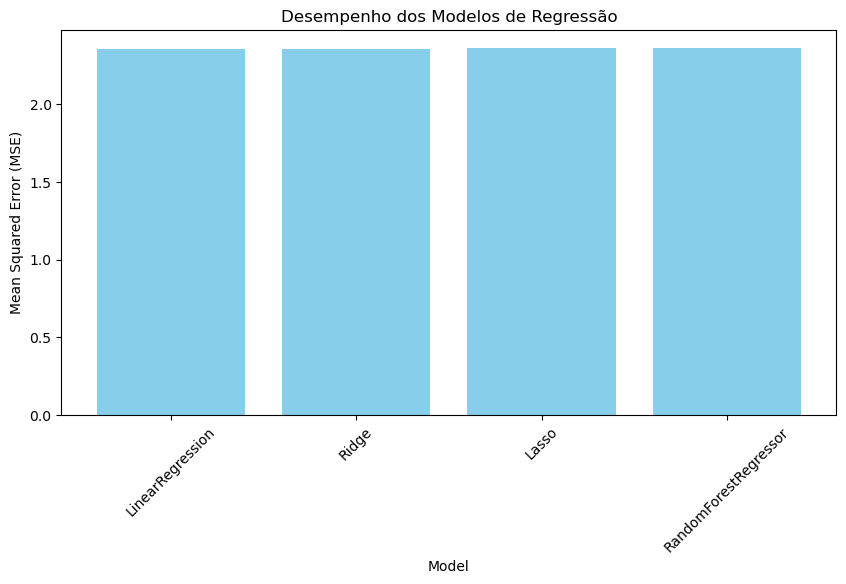

In [26]:
# Separar as variáveis de entrada (X) e o alvo (y)
X = df_corr.drop(columns=['ID', 'review_text', 'rating'])
y = df_corr['rating']

# Dividir os dados em conjuntos de treinamento, teste e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Definir as colunas categóricas para codificação one-hot
categorical_columns = ['reviewer_gender', 'reviewer_state']

# Criar transformadores para codificação one-hot
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores em um pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

# Definir uma lista de modelos de regressão
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

# Inicializar uma lista para armazenar as métricas de desempenho de cada modelo
model_metrics = []

# Treinar e avaliar cada modelo
for model in models:
    model_name = model.__class__.__name__
    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    model_metrics.append({'Model': model_name, 'MSE': mse, 'R2': r2})

# Converter as métricas em um DataFrame para análise
metrics_df = pd.DataFrame(model_metrics)

# Encontrar o modelo mais eficiente com base no menor MSE
best_model = metrics_df.loc[metrics_df['MSE'].idxmin()]

# Imprimir as métricas de desempenho
print(metrics_df)

# Imprimir o modelo mais eficiente
print("Melhor modelo:")
print(best_model)

# Salvar o modelo mais eficiente em um arquivo para uso futuro
best_model_name = best_model['Model']
best_model_instance = next(model for model in models if model.__class__.__name__ == best_model_name)
joblib.dump(best_model_instance, 'best_regression_model.pkl')

# Gerar gráficos de desempenho
plt.figure(figsize=(10, 5))
plt.bar(metrics_df['Model'], metrics_df['MSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Desempenho dos Modelos de Regressão')
plt.xticks(rotation=45)
plt.show()


# Carregando dados de teste

In [27]:
df_test = pd.read_csv('C:/Users/palmi/I2A2_Test/test.csv') 

In [28]:
df_test.head()

,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend
0,79426,2018-04-14 13:37:06,1e996f21a57bed83512bfb593648a8e84b7cc373e71262...,1982.0,M,SP,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,NaN,Celulares e Smartphones,Smartphone,Excelente,"Celular muito bom, a imagem dele em jogos impr...",Yes
1,79427,2018-01-21 17:38:59,808841afbd6011d7f8edb3a938ea4b8ad4b996e92efa6e...,1978.0,M,PR,132267647,Notebook Acer F5-573G-75A3 Intel Core 7 I7 8GB...,acer,Informática,Notebook,Excelente custo x benefício,Excelente produto! Vale a pena o investimento!...,Yes
2,79428,2018-02-01 11:28:11,228ed5791cebda164ae1da88a519394572ff0a19c0faf5...,1989.0,F,MG,112941526,Máquina de Cortar Cabelo + Aparador Wahl Clipp...,wahl,Beleza e Perfumaria,Barbearia,Produto exelente,"Fiquei muito satisfeita com minha compra, cheg...",Yes
3,79429,2018-01-27 11:42:49,842b5dd4e35fca1e6fd224a9fc6379e54fc1dc17961f73...,1970.0,F,SP,132390047,Smartphone Samsung Galaxy J5 Pro Dual Chip And...,NaN,Celulares e Smartphones,Smartphone,Gostei muito do produto,Sem comentarios..................................,Yes
4,79430,2018-01-03 08:28:43,b96e6c9264f7ff66250cf74073797e547142dccc6bfc58...,1989.0,F,RJ,20739281,Sofá 4 Lugares Connect Retrátil e Reclinável S...,NaN,Móveis,Sofá,"Ótimo produto, entrega rápida e excelente!!!","Sofá grande, confortável. Entrega muito antes...",Yes


In [29]:
# Dimensao do Dataframe
df_test.shape

(52948, 14)

In [30]:
# Contabilizando valores nulos no dataframe
df_test.isnull().sum()

ID                           0
submission_date              0
reviewer_id                  0
reviewer_birth_year       2433
reviewer_gender           1652
reviewer_state            1589
product_id                   0
product_name                32
product_brand            36612
site_category_lv1            2
site_category_lv2         1595
review_title               125
review_text               1308
recommend_to_a_friend        7
dtype: int64

In [31]:
df_testc = df_test.iloc[: , [0,4,5,12,13]].copy() 

In [32]:
df_testc.head()

,ID,reviewer_gender,reviewer_state,review_text,recommend_to_a_friend
0,79426,M,SP,"Celular muito bom, a imagem dele em jogos impr...",Yes
1,79427,M,PR,Excelente produto! Vale a pena o investimento!...,Yes
2,79428,F,MG,"Fiquei muito satisfeita com minha compra, cheg...",Yes
3,79429,F,SP,Sem comentarios..................................,Yes
4,79430,F,RJ,"Sofá grande, confortável. Entrega muito antes...",Yes


In [33]:
df_testc.shape

(52948, 5)

In [34]:
df_testc.isnull().sum()

ID                          0
reviewer_gender          1652
reviewer_state           1589
review_text              1308
recommend_to_a_friend       7
dtype: int64

# Normalizando o arquivo de teste

In [35]:
df_testc['reviewer_gender'] = df_testc['reviewer_gender'].replace({np.nan: 'I'})
df_testc['recommend_to_a_friend'] = df_testc['recommend_to_a_friend'].replace({np.nan: 'talvez' })
df_testc['review_text'] = df_testc['review_text'].replace({np.nan: 'Sem avaliacao'})
df_testc['reviewer_state'] = df_testc['reviewer_state'].replace({np.nan: 'Brasil'})

In [36]:
df_testc.tail()

,ID,reviewer_gender,reviewer_state,review_text,recommend_to_a_friend
52943,132369,M,RJ,"Dvd novo, perfeito funcionamento. Vocês dizem ...",Yes
52944,132370,M,SP,to adoradno ele duro 1 dia e meio e to gostadn...,Yes
52945,132371,M,RJ,Produto vem legendado em português qual alta q...,Yes
52946,132372,F,SP,Gosto de ferro pesado. Assim acho que a roupa ...,Yes
52947,132373,F,RJ,"Fiquei satisfeita com a compra , recebi em per...",Yes


In [37]:
# Verificando valores nulos
df_testc.isnull().sum()

ID                       0
reviewer_gender          0
reviewer_state           0
review_text              0
recommend_to_a_friend    0
dtype: int64

In [38]:
# Gerando a coluna da análise do sentimento baseada no review_test
df_testc['sentiment'] = df_corr['review_text'].apply(lambda x: 0 if TextBlob(x).sentiment.polarity < 0 
                                          else 1 if TextBlob(x).sentiment.polarity == 0
                                          else 2 if 0 < TextBlob(x).sentiment.polarity < 0.5
                                          else 3)

In [39]:
df_testc.head(50)

,ID,reviewer_gender,reviewer_state,review_text,recommend_to_a_friend,sentiment
0,79426,M,SP,"Celular muito bom, a imagem dele em jogos impr...",Yes,1
1,79427,M,PR,Excelente produto! Vale a pena o investimento!...,Yes,1
2,79428,F,MG,"Fiquei muito satisfeita com minha compra, cheg...",Yes,1
3,79429,F,SP,Sem comentarios..................................,Yes,2
4,79430,F,RJ,"Sofá grande, confortável. Entrega muito antes...",Yes,1
5,79431,F,BA,Estava na dúvida se comprava a mochila ou um h...,Yes,1
6,79432,I,Brasil,Sem avaliacao,Yes,1
7,79433,M,RJ,Tudo certo nada a reclamar de ambos Super reco...,Yes,1
8,79434,F,RJ,"produto ruim, manual com poucas informações e ...",No,1
9,79435,I,Brasil,"Excelente produto, elegante, confortável e dei...",Yes,1


In [40]:
df_testc.dtypes

ID                        int64
reviewer_gender          object
reviewer_state           object
review_text              object
recommend_to_a_friend    object
sentiment                 int64
dtype: object

# Carregando o modelo e testando

In [54]:
# Carregar o modelo treinado
model = joblib.load('best_regression_model.pkl')

# Certifique-se de que o DataFrame de teste tenha todas as colunas necessárias
X_testc_encoded = pd.get_dummies(df_testc[['reviewer_gender', 'reviewer_state', 'recommend_to_a_friend']], drop_first=True)

# Fazer as previsões de rating
y_pred = model.predict(X_testc_encoded)

# Arredondar as previsões para valores inteiros
y_pred_int = y_pred.round().astype(int)

# Adicionar as previsões como uma coluna no DataFrame df_testc
df_testc['predict_rating'] = y_pred_int

# Mostrar o DataFrame com as previsões
print(df_testc)


           ID reviewer_gender reviewer_state  \
0       79426               M             SP   
1       79427               M             PR   
2       79428               F             MG   
3       79429               F             SP   
4       79430               F             RJ   
...       ...             ...            ...   
52943  132369               M             RJ   
52944  132370               M             SP   
52945  132371               M             RJ   
52946  132372               F             SP   
52947  132373               F             RJ   

                                             review_text  \
0      Celular muito bom, a imagem dele em jogos impr...   
1      Excelente produto! Vale a pena o investimento!...   
2      Fiquei muito satisfeita com minha compra, cheg...   
3      Sem comentarios..................................   
4      Sofá  grande, confortável. Entrega muito antes...   
...                                                  ...   
529

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [56]:
df_testc

,ID,reviewer_gender,reviewer_state,review_text,recommend_to_a_friend,sentiment,predict_rating
0,79426,M,SP,"Celular muito bom, a imagem dele em jogos impr...",Yes,1,3
1,79427,M,PR,Excelente produto! Vale a pena o investimento!...,Yes,1,3
2,79428,F,MG,"Fiquei muito satisfeita com minha compra, cheg...",Yes,1,3
3,79429,F,SP,Sem comentarios..................................,Yes,2,3
4,79430,F,RJ,"Sofá grande, confortável. Entrega muito antes...",Yes,1,3
...,...,...,...,...,...,...,...
52943,132369,M,RJ,"Dvd novo, perfeito funcionamento. Vocês dizem ...",Yes,1,3
52944,132370,M,SP,to adoradno ele duro 1 dia e meio e to gostadn...,Yes,1,3
52945,132371,M,RJ,Produto vem legendado em português qual alta q...,Yes,1,3
52946,132372,F,SP,Gosto de ferro pesado. Assim acho que a roupa ...,Yes,1,3


In [60]:
# Definindo as colunas a serem usadas 
df_final = df_testc.iloc[: , [0,6]].copy() 

In [64]:
df_final = df_final.rename(columns={'predict_rating': 'rating'})

In [65]:
df_final

,ID,rating
0,79426,3
1,79427,3
2,79428,3
3,79429,3
4,79430,3
...,...,...
52943,132369,3
52944,132370,3
52945,132371,3
52946,132372,3


In [66]:
# Especifique o nome do arquivo CSV de saída
output_csv_file = 'df_final.csv'

# Exporte o DataFrame df_testc para um arquivo CSV
df_final.to_csv(output_csv_file, index=False)

# Confirme a exportação
print(f'DataFrame exportado para {output_csv_file}')

DataFrame exportado para df_final.csv
